In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("canadian_immegration_data.csv")

In [3]:
# Após execução do comando, podemos notar que não há necessidade de fazer tratamento de dados
# pois a tabela não apresenta incosistências como valores nulos ou tipagem incorreta. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [4]:
df.set_index("Country", inplace=True)

In [5]:
# Vamos criar uma variavel tipo lista para conter todos os anos, em string, dentro do intervalo de 1980 até 2014
# (sem considerar o último ano, ou seja 2014 não está incluso)
anos = list(map(str, range(1980,2014)))

In [6]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [7]:
brasil = df.loc["Brazil", anos]
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brazil, dtype: object

In [8]:
# Como nosso objetivo é analisar a imigração dos brasileiros ao longo dos anos, vamos criar um dicionário.
# Este dicionário terá as propriedades "ano" e "imigrantes.
# "ano" = Obter o index da variável "brasil" (brasil.index) e tranformá-los em uma lista (.tolist())
# "imigrantes" = Obter os valores da variável "brasil" (brasil.index) e tranformá-los em uma lista (.tolist())
brasil_dicionario = {"ano": brasil.index.tolist(), "imigrantes": brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dicionario)
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


In [9]:
# Importar a biblioteca para poder fazer a construção de gráficos
import matplotlib.pyplot as plt

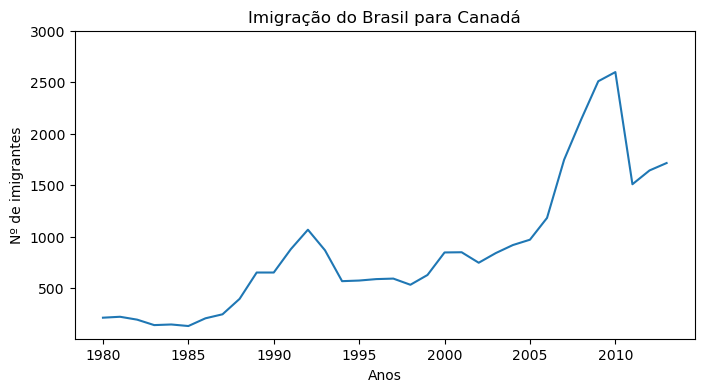

In [10]:
# Vamos definir as dimensões (em polegadas) do gráfico a ser exibido.
plt.figure(figsize=(8,4))

# Definindo o título do gráfico
plt.title("Imigração do Brasil para Canadá")

# Definir os rótulos do eixo
plt.xlabel("Anos")

# Definir os rótulos do eixo
plt.ylabel("Nº de imigrantes")

# Eixo X = dados_brasil["ano"]
# Eixo Y = dados_brasil["imigrantes"]
plt.plot(dados_brasil["ano"], dados_brasil["imigrantes"])

# Ao invés de exibir todos os anos, vamos definir a exibição dos anos em intervalos de 5 em 5.
plt.xticks(["1980", "1985", "1990", "1995", "2000", "2005", "2010"])

# Agora, faremos a alteração no eixo Y
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])

# Exibe o gráfico (e também para de exibir informações no console)
plt.show()

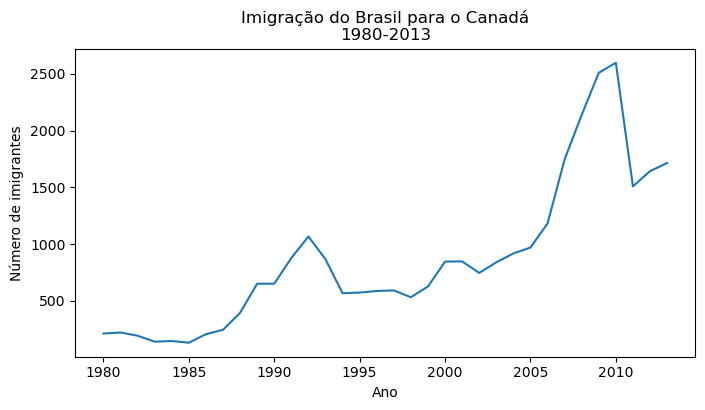

In [11]:
# Observação: As variáveis fig e ax, são objetos que dão acesso direto e explícito aos elementos do gráfico.
# Ambos permitem o acesso a mais formas de modificar o gráfico do que a maneira anterior.

# fig: Permite a criação de um figura
# ax: Representa os eixos
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil["ano"], dados_brasil["imigrantes"])
ax.set_title("Imigração do Brasil para o Canadá\n1980-2013")
ax.set_xlabel("Ano")
ax.set_ylabel("Número de imigrantes")
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

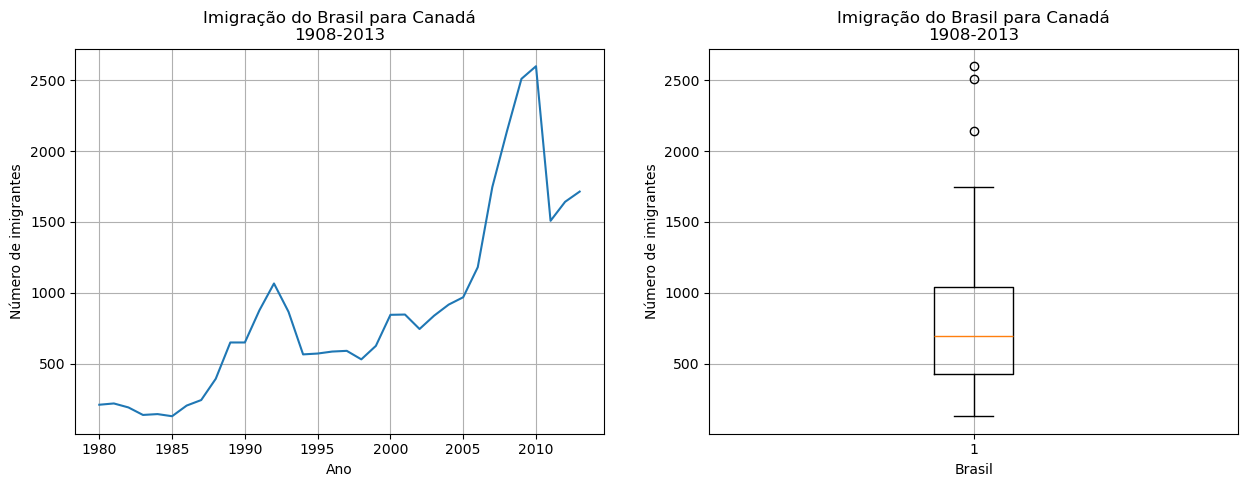

In [12]:
# Vamos "plotar" 2 gráficos em uma figura. (1 linha, 2 gráficos, tamanho da figura)
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(dados_brasil["ano"], dados_brasil["imigrantes"])
axs[0].set_title("Imigração do Brasil para Canadá\n1908-2013")
axs[0].set_xlabel("Ano")
axs[0].set_ylabel("Número de imigrantes")
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil["imigrantes"])
axs[1].set_title("Imigração do Brasil para Canadá\n1908-2013")
axs[1].set_xlabel("Brasil")
axs[1].set_ylabel("Número de imigrantes")
axs[1].grid()

plt.show()

In [13]:
# Recomendo fazer leitura sobre o gráfico boxplot!

# Quando executarmos o código abaixo, podemos obter 5 importantes informações que também fazem parte do boxplot
# Mínimo (Min):    o menor valor (excluindo outliers)
# 1º Quartil (Q1): 25% dos dados são menores que esse valor
# Mediana (Q2):    50% dos dados são menores que esse valor
# 3º Quartil (Q3): 75% dos dados são menores que esse valor
# Máximo (Max):    o maior valor (excluindo outliers)

dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


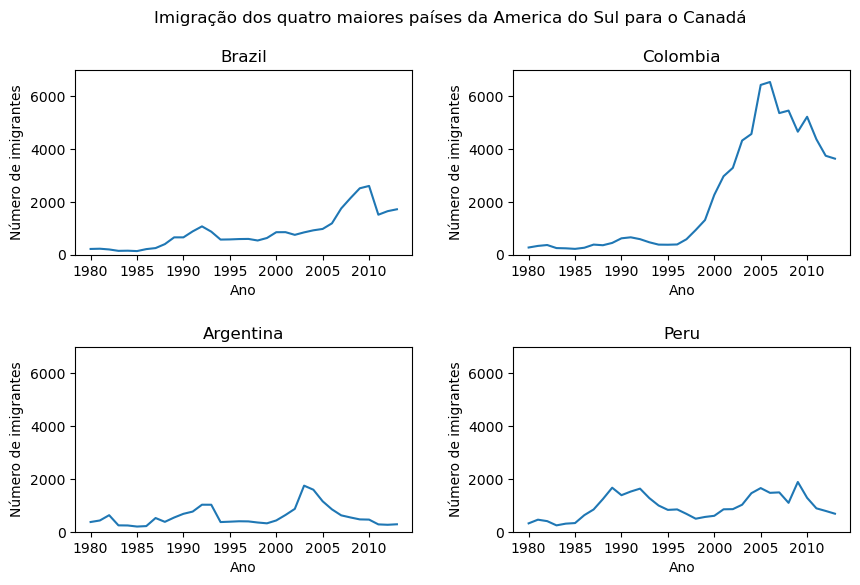

In [14]:
# Agora vamos ver, além do Brasil, como foi a situação de imigração nos outros países?

fig, axs = plt.subplots(2,2, figsize=(10,6))

# Ajusta o espaço vertical (hspace) e horizontal (wspace) entre os gráficos.
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.suptitle("Imigração dos quatro maiores países da America do Sul para o Canadá")

axs[0,0].plot(df.loc['Brazil', anos])
axs[0,0].set_title('Brazil')

axs[0,1].plot(df.loc['Colombia', anos])
axs[0,1].set_title('Colombia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

# axs:      é uma matriz (2D) de eixos, como [[ax1, ax2], [ax3, ax4]].
# axs.flat: transforma essa matriz em uma sequência plana (1D): [ax1, ax2, ax3, ax4].
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
    ax.set_xlabel("Ano")
    ax.set_ylabel("Número de imigrantes")

ymin = 0
ymax = 7000

# Observação: Para fins de contexto ravel e flat são similares, ambos fazem a mesma coisa.
# No entanto, ravel permite modificação, isto é, posso fazer: axs.ravel()[0].set_title("Brasil")
# axs.flat[0].set_title(...): Não é permitido e causará erro!
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)
    
plt.show()

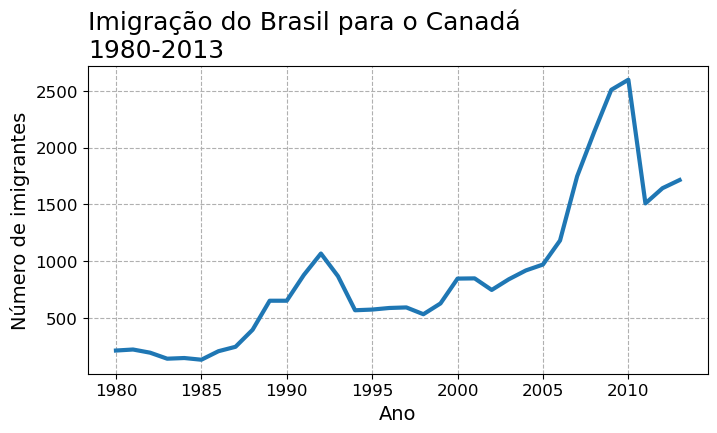

In [15]:
# Agora vamos trabalhar com mais personalizações!

fig, ax = plt.subplots(figsize=(8,4))
# lw:     Aumenta a espessura da linha
ax.plot(dados_brasil["ano"], dados_brasil["imigrantes"],lw=3)
# Aumentar o tamanho da fonte do título e alinhar à esquerda
ax.set_title("Imigração do Brasil para o Canadá\n1980-2013", fontsize=18, loc="left")
ax.set_xlabel("Ano", fontsize=14)
ax.set_ylabel("Número de imigrantes", fontsize=14)
# Aumentar o tamanho dos "ticks" exibidos no eixo X
ax.xaxis.set_tick_params(labelsize=12)
# Aumentar o tamanho dos "ticks" exibidos no eixo Y
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle="--")
plt.show()

In [16]:
# A partir daqui vamos trabalhar com outra perspectiva mas ainda focando em personalização
# Mais especificamente o uso de cores.

america_sul = df.query("Region == 'South America'")
america_sul

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,Latin America and the Caribbean,South America,Developing regions,238,207,184,155,179,208,240,...,491,525,419,437,373,353,348,282,418,12233
Guyana,Latin America and the Caribbean,South America,Developing regions,2334,2943,3575,2650,1932,2299,3942,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,Latin America and the Caribbean,South America,Developing regions,45,26,32,40,48,36,34,...,75,88,98,95,88,89,83,55,66,1944
Peru,Latin America and the Caribbean,South America,Developing regions,317,456,401,241,306,328,628,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


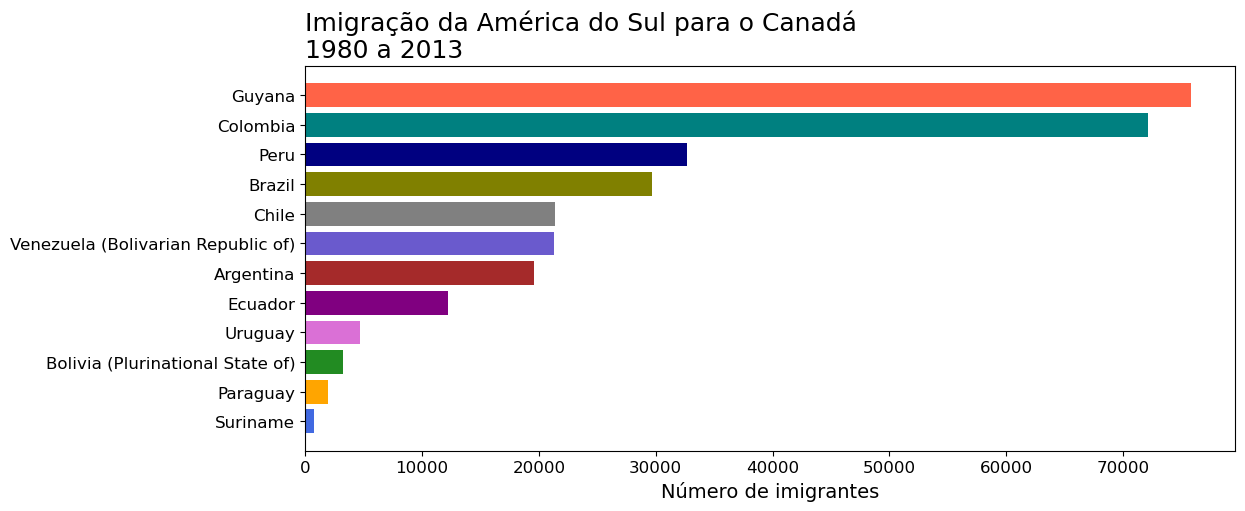

In [18]:
# As cores serão atribuídas na ordem definida.
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
america_sul_sorted = america_sul.sort_values('Total', ascending=True)

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

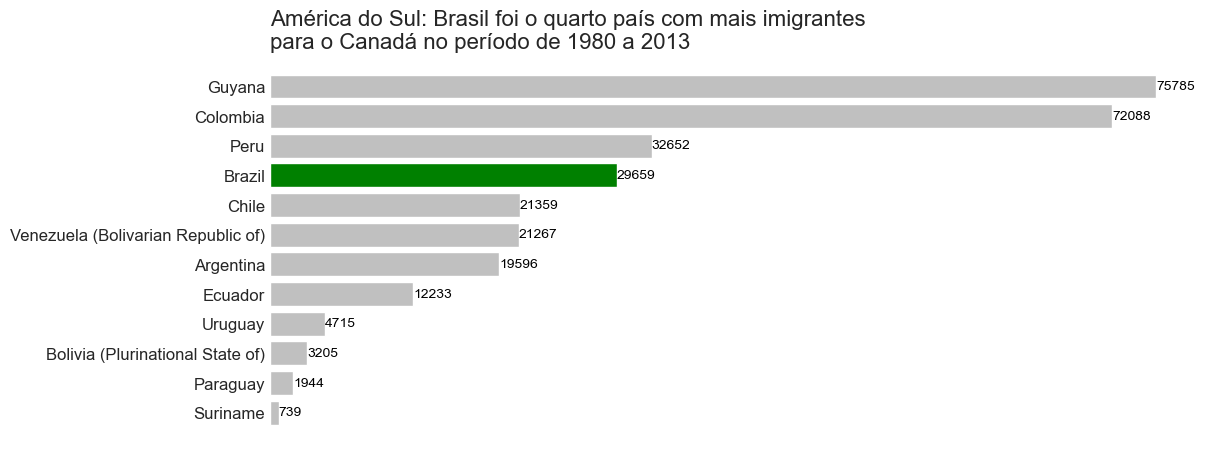

In [24]:
cores = []
for pais in america_sul_sorted.index:
    if pais == "Brazil":
        cores.append("green")
    else:
        cores.append("silver")

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted["Total"], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel("Número de imigrantes", fontsize=14)
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Inserindo os valores ao final de cada barra
# enumerate é uma função que retorna o índice (i) e o valor (v)
for i, v in enumerate(america_sul_sorted["Total"]):
    # Adiciona o número v como texto ao lado da barra i
    ax.text(
        v + 20,     # Posição x: um pouco à direita do final da barra
        i,          # Posição y: linha da barra
        str(v),     # Texto: o número de imigrantes convertido para string
        color="black",
        fontsize=10,
        ha="left",  # Alinhamento horizontal do texto
        va="center" # Alinhamento vertical
    )

# Remoção das bordas/caixa em torno do gráfico.
ax.set_frame_on(False)
# Remoção das informações do eixo X
ax.get_xaxis().set_visible(False)
# Remoção dos "ticks" em todos os eixos (axis="both")
ax.tick_params(axis="both", which="both", length=0)

plt.show()

## Nota:
# O which determina em qual tipo de tick a configuração será aplicada:
# which="major": Afeta apenas os major ticks (marcações principais).
# which="minor": Afeta apenas os minor ticks (marcações menores).
# which="both": Afeta tanto os major quanto os minor ticks.

In [19]:
# Chega de personalização, vamos aprender a salvar as figuras em um arquivo.
# transparent: Core do fundo
# dpi: resolução da imagem
# bbox_inches: ajusta os limites da figura ao gráfico
# Observação: A figura será salva no mesmo diretório do script.
fig.savefig('imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

In [20]:
# A partir de agora, vamos deixar de usar o matplotlib
# Vamos usar uma nova biblioteca para Data Visualization!
import seaborn as sns

# utilização do tema padrão para todos os próximos gráficos a serem criados
# (tem vários, basta acessar a documentação para ver mais)
sns.set_theme()

<Axes: xlabel='Country', ylabel='Total'>

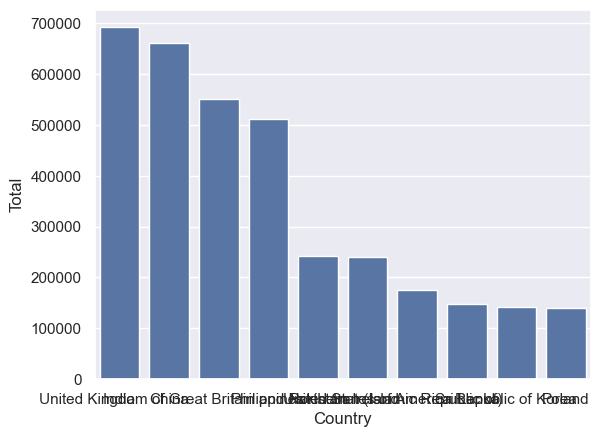

In [21]:
top_10 = df.sort_values('Total', ascending=False).head(10)

# data: Indicamos qual DF vamos usar
# x: Eixo X
# y: Ao invés de usar df["Total"], usamos apenas "Total", 
# uma vez que estamos definindo o DF no parâmetro "data"

sns.barplot(data=top_10, x=top_10.index, y="Total")

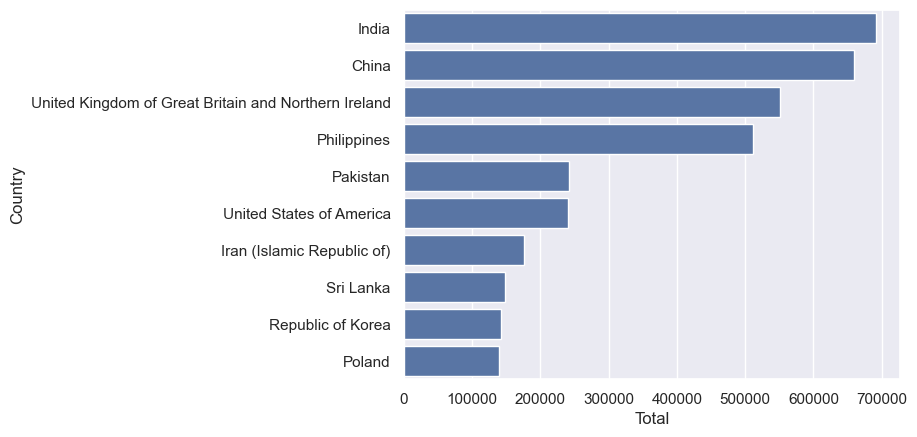

In [22]:
# O gráfico não é está muito bem visualmente, então vamos inverte-las.
sns.barplot(data=top_10, x="Total", y=top_10.index, orient="h")

ax.set(title="Países com maior imigração para o Canadá\n1980-2013",
       xlabel="Número de imigrantes",
       ylabel="")

# A biblioteca seaborn é baseada em conjunto com a matplotlib
# permitindo que sejam usadas em conjunto.
plt.show()

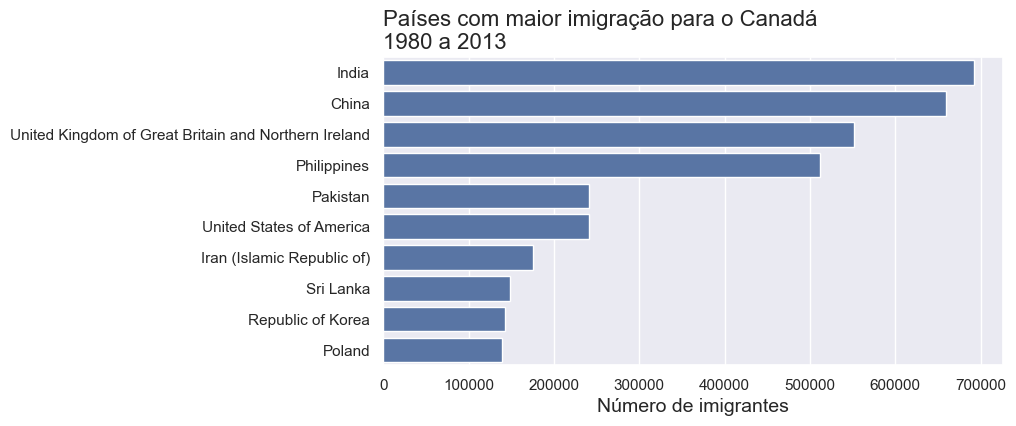

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('', fontsize=14)

plt.show()

In [28]:
def gerar_grafico_paleta(palette):
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
    ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
    ax.set_xlabel('Número de imigrantes', fontsize=14)
    ax.set_ylabel('')
    plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_16576\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


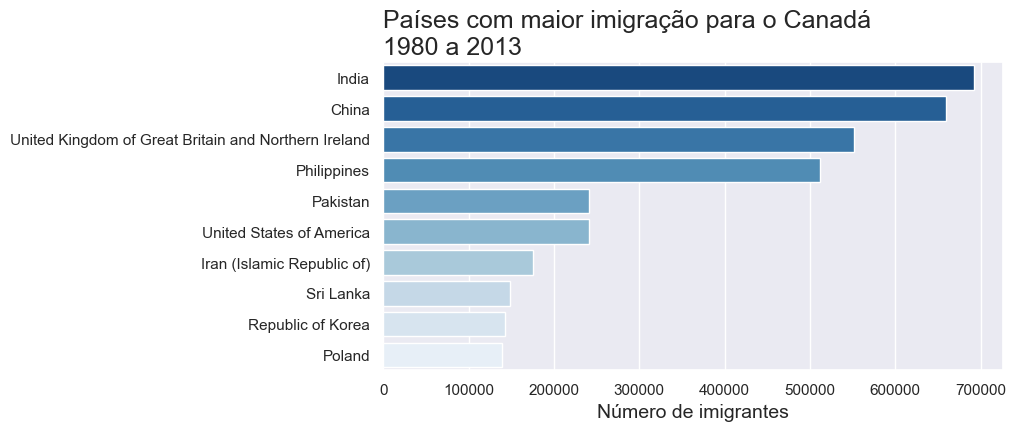

C:\Users\marce\AppData\Local\Temp\ipykernel_16576\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


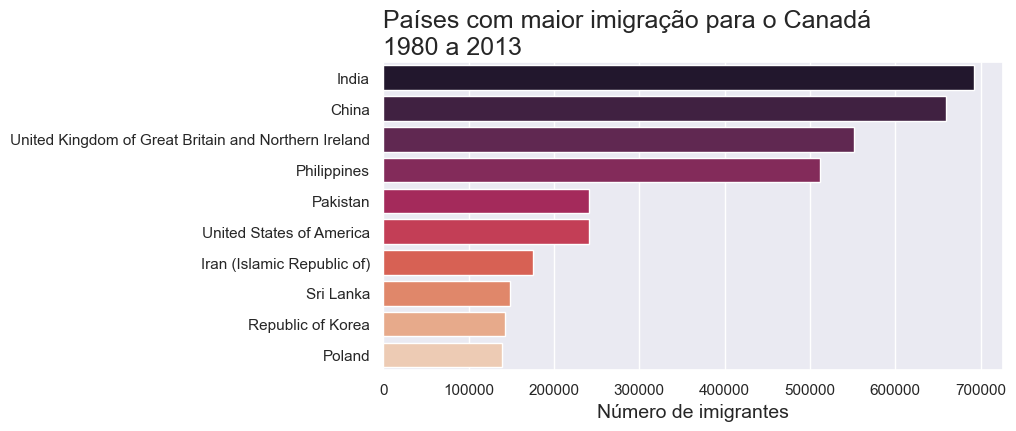

C:\Users\marce\AppData\Local\Temp\ipykernel_16576\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


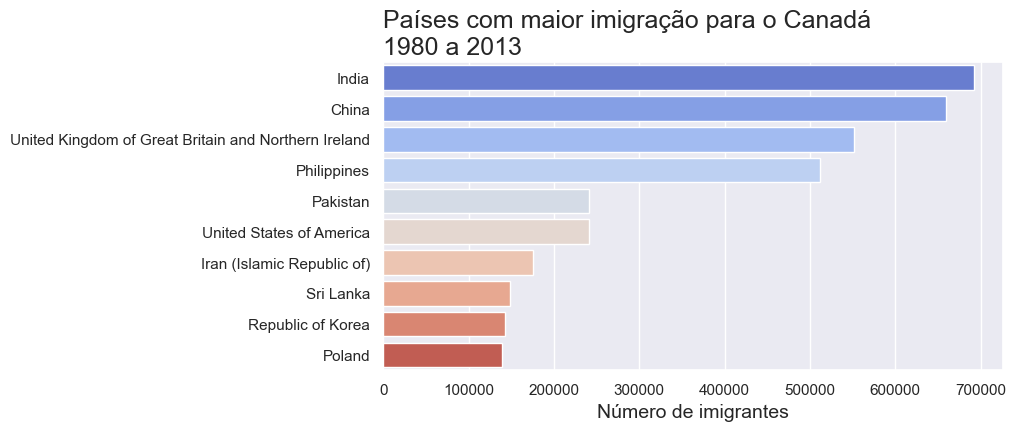

C:\Users\marce\AppData\Local\Temp\ipykernel_16576\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


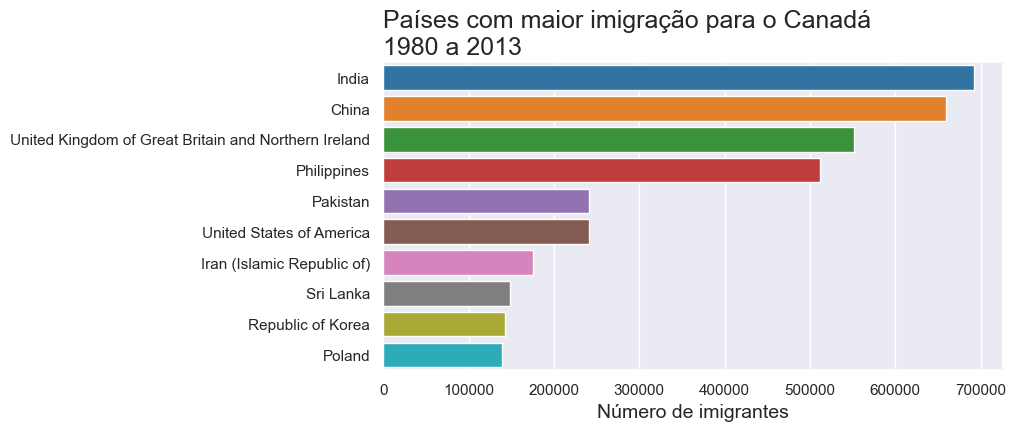

In [32]:
gerar_grafico_paleta('Blues_r')
gerar_grafico_paleta('rocket')
gerar_grafico_paleta('coolwarm')
gerar_grafico_paleta("tab10")

C:\Users\marce\AppData\Local\Temp\ipykernel_16576\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


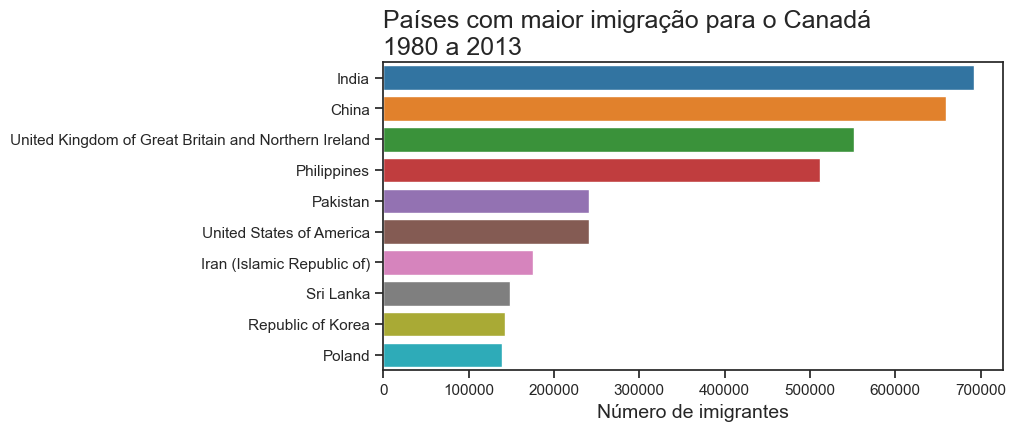

In [33]:
sns.set_theme(style='ticks')
gerar_grafico_paleta("tab10")

C:\Users\marce\AppData\Local\Temp\ipykernel_16576\2020137140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')


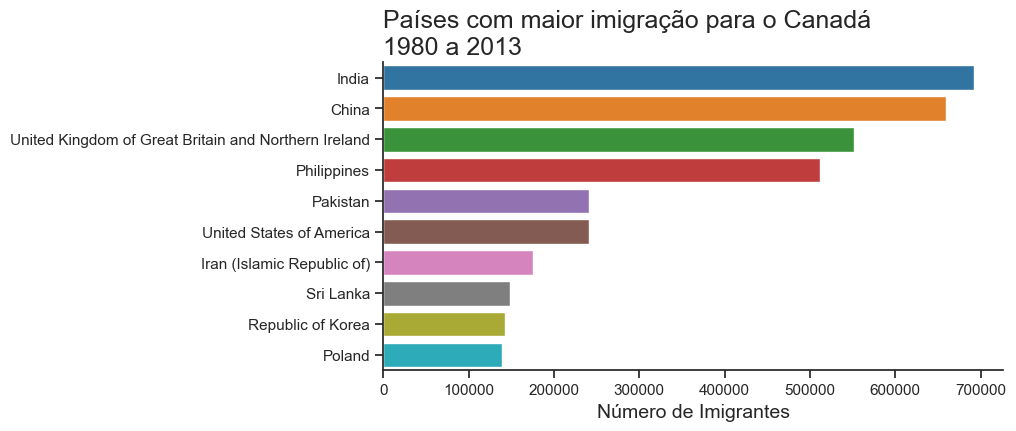

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')

ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de Imigrantes', fontsize=14)
ax.set_ylabel('')
# Remove as linhas de borda de cima de direita
sns.despine()

plt.show()

In [36]:
# Apartir daqui, iremos estudar um pouco sobre outra biblioteca capaz de gerar gráficos interativos

import plotly.express as px

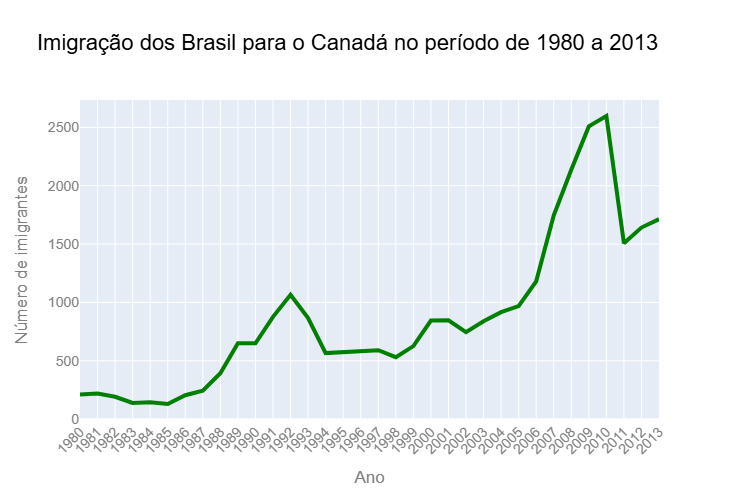

In [51]:
# Criando um gráfico interativo com plotly.
fig = px.line(
    dados_brasil, 
    x='ano', 
    y='imigrantes',
    title='Imigração dos Brasil para o Canadá no período de 1980 a 2013'
)

# Alterar a linha do gráfico de linha
fig.update_traces(line_color='green', line_width=4)

# Essa função "update_layout", permite fazer algumas alterações no design do gráfico a ser exibido.
fig.update_layout(
    width=1000,
    height=500,
    xaxis={'tickangle': -45}, # Rotação das informações/ticks do eixo X
    xaxis_title="Ano",
    yaxis_title="Número de imigrantes",
    font_family="Arial",
    font_size=14,
    font_color="grey",
    title_font_color="black",
    title_font_size=22
) 

fig.show()

In [52]:
america_sul.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [54]:
df_america_sul_clean = america_sul.drop(["Continent", "Region", "Total"], axis=1)
america_sul_final = df_america_sul_clean.T # T = transposição
america_sul_final.head()

Country,Argentina,Bolivia (Plurinational State of),Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela (Bolivarian Republic of)
DevName,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124


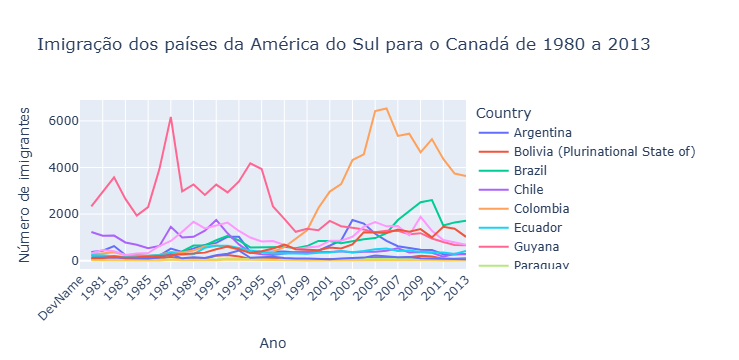

In [59]:
fig = px.line(
    america_sul_final,
    x=america_sul_final.index,
    y=america_sul_final.columns,
    color="Country",
    title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013'
)

fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

In [60]:
fig.write_html("imigracao_america_sul.html")